Moving Average is taking the mean over a ceratin time horizon 


Crossover Strategy : 

We are buy the asset the short term moving average (20 day), is crossing above the long term moving average (50 day)

    Between the 50 day and 200 day moving average, the above is called the GOLDEN CROSS, for below it's called the DEATH CROSS

We are selling the asset when the short term moving average is crossing below the long term moving average [golden cross]

In [5]:
import yfinance as yf # get asset prices 
import pandas as pd # for data handeling and data manipulation
import matplotlib.pyplot as plt # visualise result 

In [ ]:
# Get price data for German equity index 

In [6]:
# GDAXI --> ticker symbol
# from 2019
df = yf.download('^GDAXI', start= '2019-01-01' )


[*********************100%***********************]  1 of 1 completed


In [7]:
df 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200
...,...,...,...,...,...,...
2021-02-09,14055.599609,14061.610352,13962.139648,14011.799805,14011.799805,58414500
2021-02-10,14063.120117,14063.120117,13830.120117,13932.969727,13932.969727,67411900
2021-02-11,13958.389648,14053.059570,13916.629883,14040.910156,14040.910156,53851500


In [ ]:
# rolling over Adj Close column 
# for 20 days, taking inwindw of 20 days 
# for 50 days , taking 50 days 

In [8]:
df['MA20'] = df['Adj Close'].rolling(20).mean()

df['MA50'] = df['Adj Close'].rolling(50).mean()

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700,NaN,NaN
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800,NaN,NaN
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500,NaN,NaN
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400,NaN,NaN
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-02-09,14055.599609,14061.610352,13962.139648,14011.799805,14011.799805,58414500,13848.599951,13638.371426
2021-02-10,14063.120117,14063.120117,13830.120117,13932.969727,13932.969727,67411900,13848.995459,13651.234824
2021-02-11,13958.389648,14053.059570,13916.629883,14040.910156,14040.910156,53851500,13854.055469,13666.321621


In [10]:
df = df.dropna()

In [ ]:
# some data cleaning

In [11]:
df = df[['Adj Close', 'MA20','MA50']]

In [12]:
df

,Adj Close,MA20,MA50
Date,,,
2019-03-12,11524.169922,11447.165967,11187.565020
2019-03-13,11572.410156,11467.425488,11207.409414
2019-03-14,11587.469727,11492.309473,11230.825605
2019-03-15,11685.690430,11511.604004,11249.185605
2019-03-18,11657.059570,11529.496973,11267.370605
...,...,...,...
2021-02-09,14011.799805,13848.599951,13638.371426
2021-02-10,13932.969727,13848.995459,13651.234824
2021-02-11,14040.910156,13854.055469,13666.321621


In [ ]:
# Defining buying and selling signals

In [ ]:
# Checking for the buying signal : 
# the moving average of the 20 days is above the 50 days 
# but isn't the day before

In [ ]:
# Checking for the selling signal : 
# the moving average of the 50 days is above the 20 days 
# but isn't the day before

In [16]:
# create 2 empty lists
Buy = []

Sell = []

# looping over whole date frame 
for i in range(len(df)):
    if df.MA20.iloc[i] > df.MA50.iloc[i] \
    and df.MA20[i-1] < df.MA50.iloc[i-1]:
        Buy.append(i)
    elif df.MA20.iloc[i] < df.MA50.iloc[i] \
    and df.MA20[i-1] > df.MA50.iloc[i-1]:
        Sell.append(i)

In [17]:
Buy

[75, 132, 288, 432]

In [18]:
Sell # row numbers where condtions are fulfilled

[59, 102, 243, 398]

In [ ]:
# Visulisations

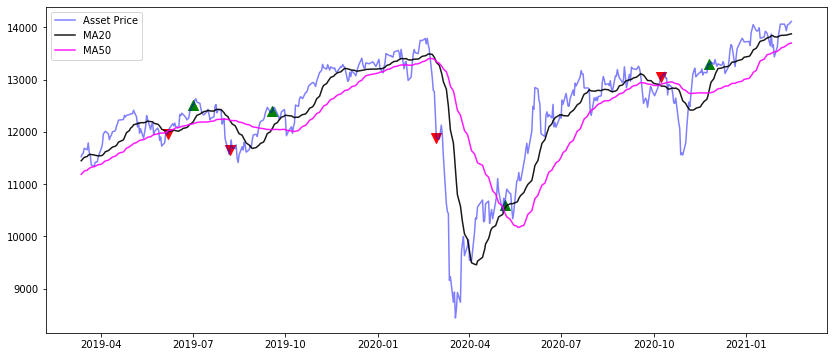

In [26]:
# Asset Price plot
# alpha dictates transparency with max being one

plt.figure(figsize=(14,6))
plt.plot(df['Adj Close'], label= 'Asset Price', c='blue', alpha=0.5)


# Moving averages
plt.plot(df['MA20'], label='MA20', c='k', alpha= 0.9)

plt.plot(df['MA50'], label='MA50', c='magenta', alpha= 0.9)

# Trading Signals, scatter plot
#Scatter Plot, need to define 
#    x-axis: dates when we should buy the asset
#    y-axis: 

plt.scatter(df.iloc[Buy].index,df.iloc[Buy]['Adj Close'], marker='^',
           color='g', s=100) # s = size 


plt.scatter(df.iloc[Sell].index,df.iloc[Sell]['Adj Close'], marker='v',
           color='r', s=100) # s = size 

plt.legend() # define a legend
plt.show()



# To:do 
    Best Pair of Trading averages

In [ ]:
# Note; the longer the time window of the moving average,
#     the smoother the line
# We are getting rid of the noise of the chart
# There is time lag of the time drift, which gets worst the longer 
#the time of the movign average 
# A fix, would be to the take the exponential moving average